This portion of the project will analyze the prevalence of specific topics of music lyrics by decade, and also by specific genres. For this, we found a dataset showing numerous songs and their topics based on keywords found in the song's lyrics. 

In [63]:
import pandas as pd

music_topics = pd.read_csv("./data/music_topics.csv", header=0)
print(music_topics.head())
print(music_topics.tail())
print(music_topics.shape)
print(music_topics["topic"].value_counts()["sadness"])


   Unnamed: 0           artist_name            track_name  release_date genre  \
0           0                mukesh  mohabbat bhi jhoothi          1950   pop   
1           4         frankie laine             i believe          1950   pop   
2           6           johnnie ray                   cry          1950   pop   
3          10           pérez prado              patricia          1950   pop   
4          12  giorgos papadopoulos    apopse eida oneiro          1950   pop   

                                              lyrics  len    dating  violence  \
0  hold time feel break feel untrue convince spea...   95  0.000598  0.063746   
1  believe drop rain fall grow believe darkest ni...   51  0.035537  0.096777   
2  sweetheart send letter goodbye secret feel bet...   24  0.002770  0.002770   
3  kiss lips want stroll charm mambo chacha merin...   54  0.048249  0.001548   
4  till darling till matter know till dream live ...   48  0.001350  0.001350   

   world/life  ...   sadne

In [64]:
#Check for duplicates
music_topics.duplicated().sum()

0

In [65]:
#get names of columns
print(music_topics.columns)

Index(['Unnamed: 0', 'artist_name', 'track_name', 'release_date', 'genre',
       'lyrics', 'len', 'dating', 'violence', 'world/life', 'night/time',
       'shake the audience', 'family/gospel', 'romantic', 'communication',
       'obscene', 'music', 'movement/places', 'light/visual perceptions',
       'family/spiritual', 'like/girls', 'sadness', 'feelings', 'danceability',
       'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy',
       'topic', 'age'],
      dtype='object')


In [66]:
#Remove irrelevant columns (only works when put into another variable for some reason)
drop_cols = ['Unnamed: 0', 'dating', 'len', 'shake the audience', 'family/gospel', 'communication', 'music', 'movement/places', 'light/visual perceptions', 'family/spiritual', 'like/girls', 'feelings', 'danceability', 'loudness', 'acousticness', 'instrumentalness', 'valence', 'energy', 'age']
music_topics_df = music_topics.drop(labels=drop_cols, axis=1)
#print(music_topics["topic"].value_counts()["sadness"])
#verify that columns were dropped
print(music_topics_df.shape)
print(music_topics_df.columns)

(28372, 12)
Index(['artist_name', 'track_name', 'release_date', 'genre', 'lyrics',
       'violence', 'world/life', 'night/time', 'romantic', 'obscene',
       'sadness', 'topic'],
      dtype='object')


In [67]:
#check for any null values 
print(music_topics_df.isnull().values.any())
print(music_topics_df.isnull().values.sum())

False
0


In [68]:
#drop rows where topic equals feelings
music_topics_df = music_topics_df.drop(music_topics_df[music_topics_df["topic"] == "feelings"].index)
print(music_topics_df.shape)

(27760, 12)


In [69]:
music_topics_df.groupby(by='topic').count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303,2303
night/time,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825,1825
obscene,4882,4882,4882,4882,4882,4882,4882,4882,4882,4882,4882
romantic,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524,1524
sadness,6096,6096,6096,6096,6096,6096,6096,6096,6096,6096,6096
violence,5710,5710,5710,5710,5710,5710,5710,5710,5710,5710,5710
world/life,5420,5420,5420,5420,5420,5420,5420,5420,5420,5420,5420


['music', 'night/time', 'obscene', 'romantic', 'sadness', 'violence', 'world/life']


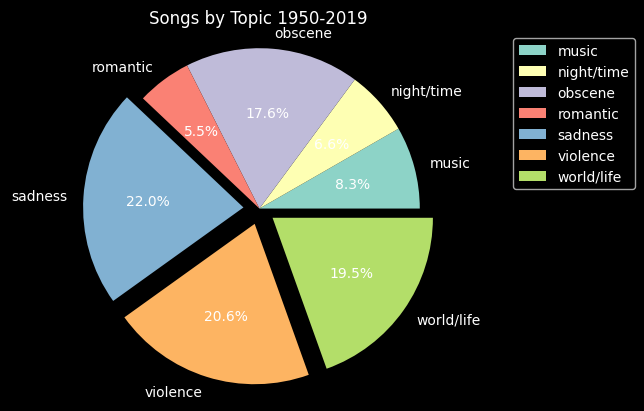

In [132]:
import matplotlib.pyplot as plt

labels = list(music_topics_df.topic.unique())
#alphabetize label list
labels.sort()
print(labels)

num_topics = [2303, 1825, 4882, 1524, 6096, 5710, 5420]
explode = [0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1]

fig1, ax1 = plt.subplots()

ax1.pie(num_topics, explode=explode, labels= labels, autopct="%1.1f%%")

ax1.axis('equal')

plt.title('Songs by Topic 1950-2019')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()




In [71]:
#parse data out by genre
print(music_topics_df.genre.unique())
music_topics_pop = music_topics_df.loc[music_topics_df.genre == 'pop']
print(music_topics_pop.shape)
music_topics_country = music_topics_df.loc[music_topics_df.genre == 'country']
print(music_topics_country.shape)
music_topics_blues = music_topics_df.loc[music_topics_df.genre == 'blues']
print(music_topics_blues.shape)
music_topics_jazz = music_topics_df.loc[music_topics_df.genre == 'jazz']
print(music_topics_jazz.shape)
music_topics_reggae = music_topics_df.loc[music_topics_df.genre == 'reggae']
print(music_topics_reggae.shape)
music_topics_rock = music_topics_df.loc[music_topics_df.genre == 'rock']
print(music_topics_rock.shape)
music_topics_hip_hop = music_topics_df.loc[music_topics_df.genre == 'hip hop']
print(music_topics_hip_hop.shape)



['pop' 'country' 'blues' 'jazz' 'reggae' 'rock' 'hip hop']
(6902, 12)
(5340, 12)
(4457, 12)
(3764, 12)
(2442, 12)
(3953, 12)
(902, 12)


I removed the topic 'feelings' because it isn't descriptive enough or prevalent enough to gain anything of significance from it.

In [72]:
print(music_topics_df.topic.unique())
music_topics_pop.groupby(by="topic").count()

['sadness' 'world/life' 'music' 'romantic' 'violence' 'obscene'
 'night/time']


,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,503,503,503,503,503,503,503,503,503,503,503
night/time,455,455,455,455,455,455,455,455,455,455,455
obscene,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220,1220
romantic,431,431,431,431,431,431,431,431,431,431,431
sadness,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702,1702
violence,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242,1242
world/life,1349,1349,1349,1349,1349,1349,1349,1349,1349,1349,1349


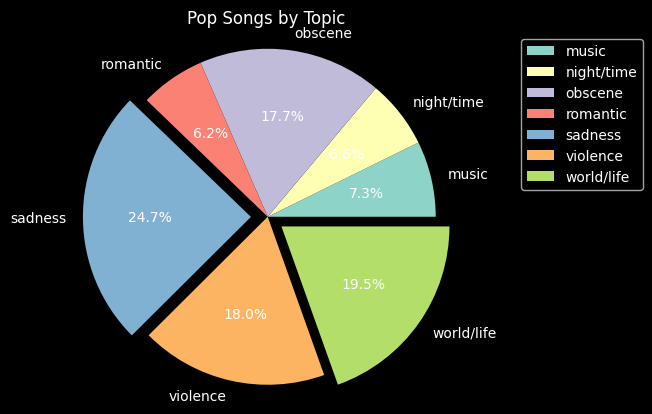

In [73]:
num_topics_pop = [503, 455, 1220, 431, 1702, 1242, 1349]
explode_pop = [0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1]

fig_pop, ax_pop = plt.subplots()

ax_pop.pie(num_topics_pop, explode=explode_pop, labels= labels, autopct="%1.1f%%")

ax_pop.axis('equal')

plt.title('Pop Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()




In [74]:
music_topics_country.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,592,592,592,592,592,592,592,592,592,592,592
night/time,373,373,373,373,373,373,373,373,373,373,373
obscene,635,635,635,635,635,635,635,635,635,635,635
romantic,299,299,299,299,299,299,299,299,299,299,299
sadness,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571,1571
violence,702,702,702,702,702,702,702,702,702,702,702
world/life,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168,1168


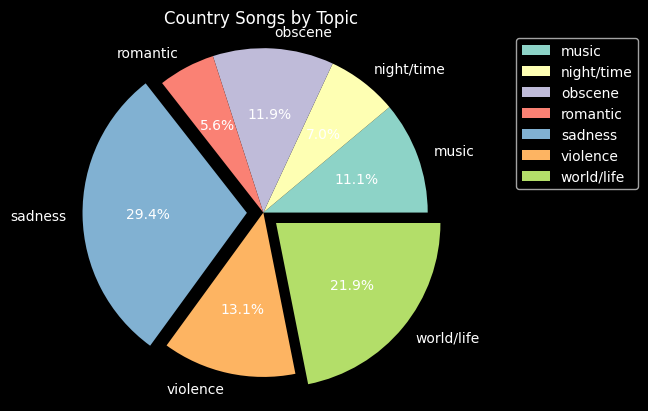

In [75]:

num_topics_country = [592, 373, 635, 299, 1571, 702, 1168]
explode_country = [0.0, 0.0, 0.0, 0.0, 0.1, 0.0, 0.1]

fig_country, ax_country = plt.subplots()

ax_country.pie(num_topics_country, explode=explode_country, labels= labels, autopct="%1.1f%%")

ax_country.axis('equal')

plt.title('Country Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [76]:
music_topics_blues.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,453,453,453,453,453,453,453,453,453,453,453
night/time,355,355,355,355,355,355,355,355,355,355,355
obscene,605,605,605,605,605,605,605,605,605,605,605
romantic,309,309,309,309,309,309,309,309,309,309,309
sadness,894,894,894,894,894,894,894,894,894,894,894
violence,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096,1096
world/life,745,745,745,745,745,745,745,745,745,745,745


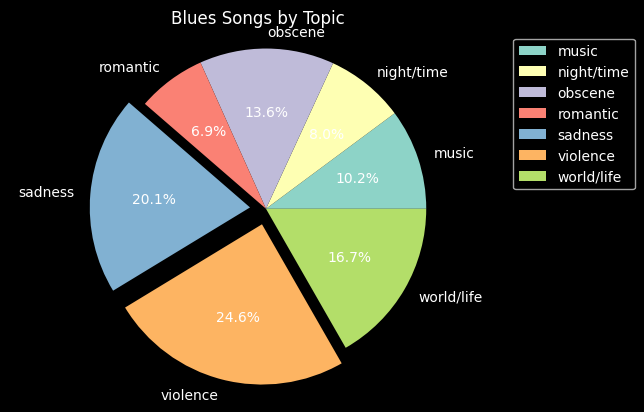

In [77]:
num_topics_blues = [453, 355, 605, 309, 894, 1096, 745]
explode_blues = [0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.0]

fig_blues, ax_blues = plt.subplots()

ax_blues.pie(num_topics_blues, explode= explode_blues, labels= labels, autopct="%1.1f%%")

ax_blues.axis('equal')

plt.title('Blues Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [78]:
music_topics_jazz.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,390,390,390,390,390,390,390,390,390,390,390
night/time,220,220,220,220,220,220,220,220,220,220,220
obscene,672,672,672,672,672,672,672,672,672,672,672
romantic,294,294,294,294,294,294,294,294,294,294,294
sadness,726,726,726,726,726,726,726,726,726,726,726
violence,681,681,681,681,681,681,681,681,681,681,681
world/life,781,781,781,781,781,781,781,781,781,781,781


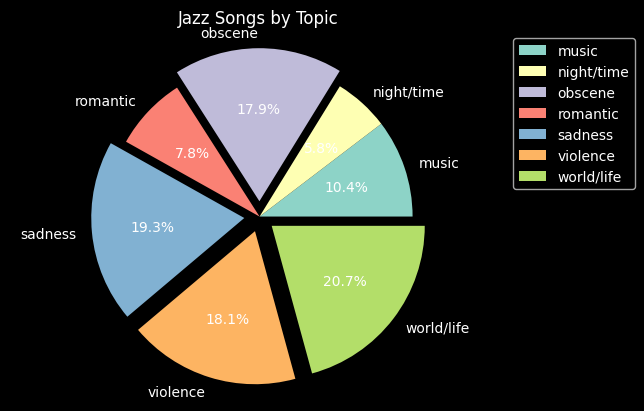

In [79]:
num_topics_jazz = [390, 220, 672, 294, 726, 681, 781]
explode_jazz = [0.0, 0.0, 0.1, 0.0, 0.1, 0.1, 0.1]

fig_jazz, ax_jazz = plt.subplots()

ax_jazz.pie(num_topics_jazz, explode=explode_jazz, labels= labels, autopct="%1.1f%%")

ax_jazz.axis('equal')

plt.title('Jazz Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [80]:
music_topics_reggae.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,137,137,137,137,137,137,137,137,137,137,137
night/time,140,140,140,140,140,140,140,140,140,140,140
obscene,647,647,647,647,647,647,647,647,647,647,647
romantic,55,55,55,55,55,55,55,55,55,55,55
sadness,289,289,289,289,289,289,289,289,289,289,289
violence,586,586,586,586,586,586,586,586,586,586,586
world/life,588,588,588,588,588,588,588,588,588,588,588


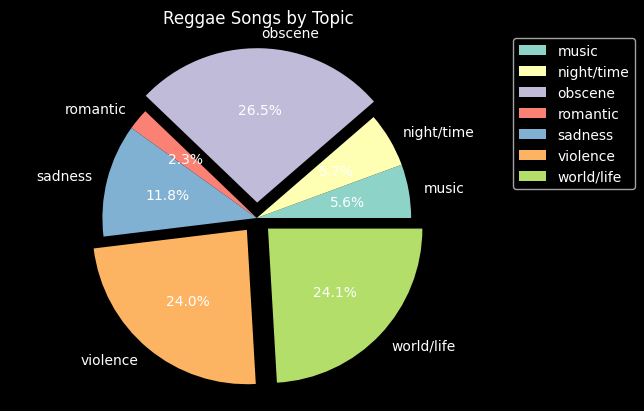

In [81]:
num_topics_reggae = [137, 140, 647, 55, 289, 586, 588]
explode_reggae = [0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.1]

fig_reggae, ax_reggae = plt.subplots()

ax_reggae.pie(num_topics_reggae, explode= explode_reggae, labels= labels, autopct="%1.1f%%")

ax_reggae.axis('equal')

plt.title('Reggae Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [82]:
music_topics_rock.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,213,213,213,213,213,213,213,213,213,213,213
night/time,272,272,272,272,272,272,272,272,272,272,272
obscene,407,407,407,407,407,407,407,407,407,407,407
romantic,133,133,133,133,133,133,133,133,133,133,133
sadness,878,878,878,878,878,878,878,878,878,878,878
violence,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306,1306
world/life,744,744,744,744,744,744,744,744,744,744,744


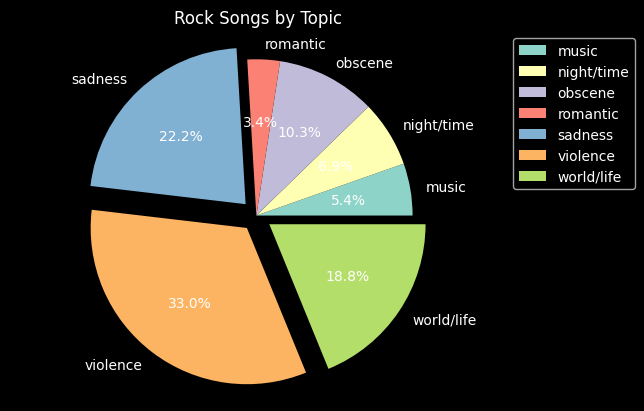

In [83]:
num_topics_rock = [213, 272, 407, 133, 878, 1306, 744]
explode_rock = [0.0, 0.0, 0.0, 0.0, 0.1, 0.1, 0.1]

fig_rock, ax_rock = plt.subplots()

ax_rock.pie(num_topics_rock, explode= explode_rock, labels= labels, autopct="%1.1f%%")

ax_rock.axis('equal')

plt.title('Rock Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [84]:
music_topics_hip_hop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,15,15,15,15,15,15,15,15,15,15,15
night/time,10,10,10,10,10,10,10,10,10,10,10
obscene,696,696,696,696,696,696,696,696,696,696,696
romantic,3,3,3,3,3,3,3,3,3,3,3
sadness,36,36,36,36,36,36,36,36,36,36,36
violence,97,97,97,97,97,97,97,97,97,97,97
world/life,45,45,45,45,45,45,45,45,45,45,45


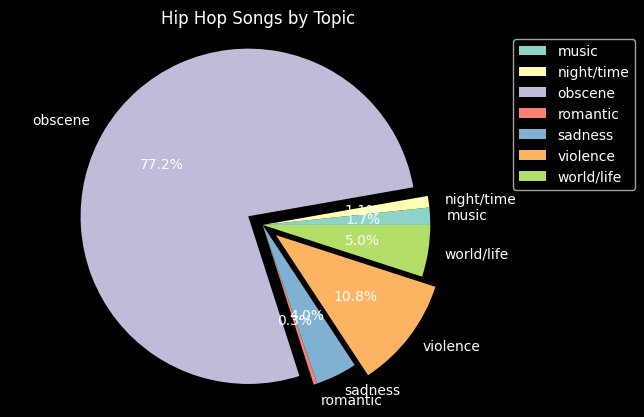

In [85]:
num_topics_hip_hop = [15, 10, 696, 3, 36, 97, 45]
explode_hip_hop = [0.0, 0.0, 0.1, 0.0, 0.0, 0.1, 0.0]

fig_hip_hop, ax_hip_hop = plt.subplots()

ax_hip_hop.pie(num_topics_hip_hop, explode= explode_hip_hop, labels= labels, autopct="%1.1f%%")

ax_hip_hop.axis('equal')

plt.title('Hip Hop Songs by Topic')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [86]:
#parse the data out by decades 
music_topics_fifties = music_topics_df.loc[music_topics_df.release_date.isin([1950, 1951, 1952, 1953, 1954, 1955, 1956, 1957, 1958, 1959])]
print(music_topics_fifties.shape)

music_topics_sixties = music_topics_df.loc[music_topics_df.release_date.isin([1960, 1961, 1962, 1963, 1964, 1965, 1966, 1967, 1968, 1969])]
print(music_topics_sixties.shape)

music_topics_seventies = music_topics_df.loc[music_topics_df.release_date.isin([1970, 1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979])]
print(music_topics_seventies.shape)

music_topics_eighties = music_topics_df.loc[music_topics_df.release_date.isin([1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989])]
print(music_topics_eighties.shape)

music_topics_nineties = music_topics_df.loc[music_topics_df.release_date.isin([1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999])]
print(music_topics_nineties.shape)

music_topics_2000s = music_topics_df.loc[music_topics_df.release_date.isin([2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009])]
print(music_topics_2000s.shape)

music_topics_2010s = music_topics_df.loc[music_topics_df.release_date.isin([2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019])]
print(music_topics_2010s.shape)

(1443, 12)
(3324, 12)
(3826, 12)
(4581, 12)
(4372, 12)
(4678, 12)
(5536, 12)


In [87]:
music_topics_fifties.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,229,229,229,229,229,229,229,229,229,229,229
night/time,99,99,99,99,99,99,99,99,99,99,99
obscene,145,145,145,145,145,145,145,145,145,145,145
romantic,249,249,249,249,249,249,249,249,249,249,249
sadness,344,344,344,344,344,344,344,344,344,344,344
violence,136,136,136,136,136,136,136,136,136,136,136
world/life,241,241,241,241,241,241,241,241,241,241,241


Text(0, 0.5, 'count')

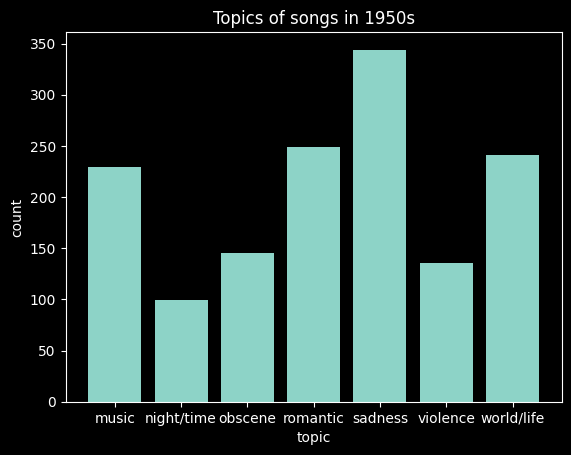

In [88]:
fifties_count = [229, 99, 145, 249, 344, 136, 241]

plt.style.use('dark_background')

plt.bar(labels, fifties_count)

plt.title("Topics of songs in 1950s")
  
plt.xlabel('topic')
plt.ylabel('count')

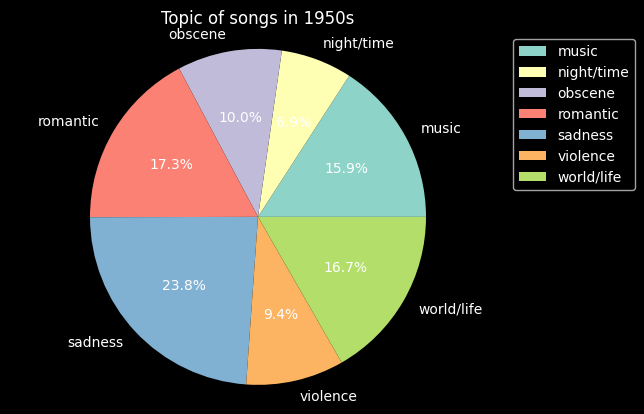

In [89]:
fig_50s, ax_50s = plt.subplots()

ax_50s.pie(fifties_count, labels= labels, autopct="%1.1f%%")

ax_50s.axis('equal')

plt.title('Topic of songs in 1950s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [90]:
music_topics_sixties.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,431,431,431,431,431,431,431,431,431,431,431
night/time,245,245,245,245,245,245,245,245,245,245,245
obscene,317,317,317,317,317,317,317,317,317,317,317
romantic,351,351,351,351,351,351,351,351,351,351,351
sadness,898,898,898,898,898,898,898,898,898,898,898
violence,390,390,390,390,390,390,390,390,390,390,390
world/life,692,692,692,692,692,692,692,692,692,692,692


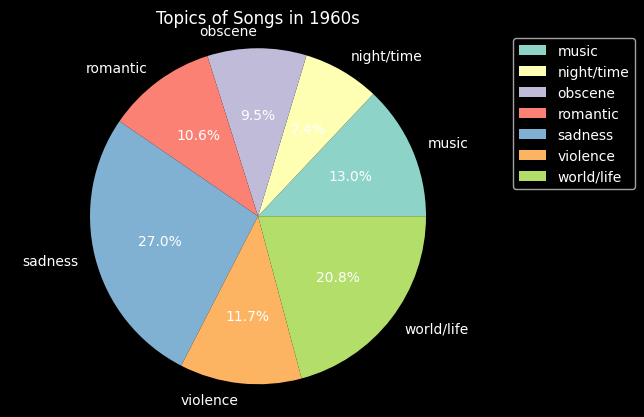

In [91]:
sixties_count = [431, 245, 317, 351, 898, 390, 692]
fig_60s, ax_60s = plt.subplots()

ax_60s.pie(sixties_count, labels= labels, autopct="%1.1f%%")

ax_60s.axis('equal')

plt.title('Topics of Songs in 1960s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [92]:
music_topics_seventies.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,461,461,461,461,461,461,461,461,461,461,461
night/time,304,304,304,304,304,304,304,304,304,304,304
obscene,420,420,420,420,420,420,420,420,420,420,420
romantic,227,227,227,227,227,227,227,227,227,227,227
sadness,774,774,774,774,774,774,774,774,774,774,774
violence,701,701,701,701,701,701,701,701,701,701,701
world/life,939,939,939,939,939,939,939,939,939,939,939


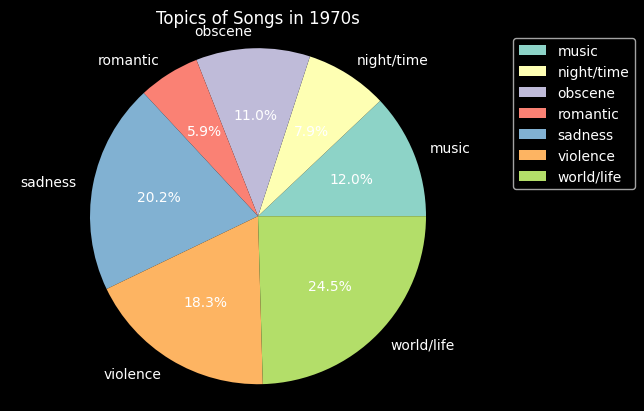

In [93]:
seventies_count = [461, 304, 420, 227, 774, 701, 939]
fig_70s, ax_70s = plt.subplots()

ax_70s.pie(seventies_count, labels= labels, autopct="%1.1f%%")

ax_70s.axis('equal')

plt.title('Topics of Songs in 1970s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [94]:
music_topics_eighties.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,338,338,338,338,338,338,338,338,338,338,338
night/time,344,344,344,344,344,344,344,344,344,344,344
obscene,595,595,595,595,595,595,595,595,595,595,595
romantic,222,222,222,222,222,222,222,222,222,222,222
sadness,1138,1138,1138,1138,1138,1138,1138,1138,1138,1138,1138
violence,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052,1052
world/life,892,892,892,892,892,892,892,892,892,892,892


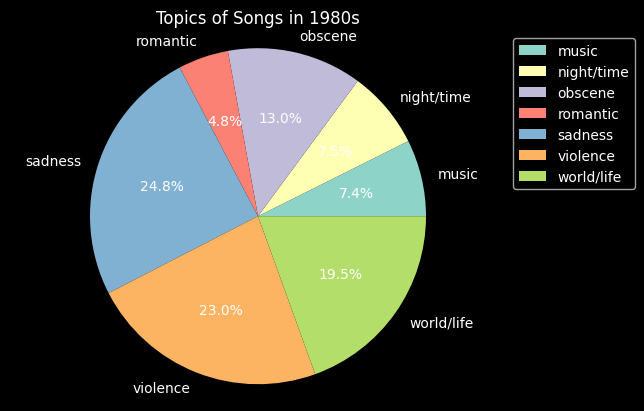

In [95]:
eighties_count = [338, 344, 595, 222, 1138, 1052, 892]
fig_80s, ax_80s = plt.subplots()

ax_80s.pie(eighties_count, labels= labels, autopct="%1.1f%%")

ax_80s.axis('equal')

plt.title('Topics of Songs in 1980s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [96]:
music_topics_nineties.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,308,308,308,308,308,308,308,308,308,308,308
night/time,237,237,237,237,237,237,237,237,237,237,237
obscene,763,763,763,763,763,763,763,763,763,763,763
romantic,188,188,188,188,188,188,188,188,188,188,188
sadness,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005,1005
violence,979,979,979,979,979,979,979,979,979,979,979
world/life,892,892,892,892,892,892,892,892,892,892,892


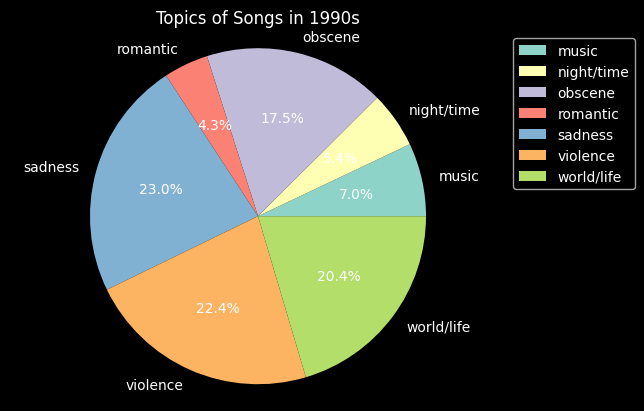

In [97]:
nineties_count = [308, 237, 763, 188, 1005, 979, 892]
fig_90s, ax_90s = plt.subplots()

ax_90s.pie(nineties_count, labels= labels, autopct="%1.1f%%")

ax_90s.axis('equal')

plt.title('Topics of Songs in 1990s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [98]:
music_topics_2000s.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,293,293,293,293,293,293,293,293,293,293,293
night/time,277,277,277,277,277,277,277,277,277,277,277
obscene,963,963,963,963,963,963,963,963,963,963,963
romantic,168,168,168,168,168,168,168,168,168,168,168
sadness,944,944,944,944,944,944,944,944,944,944,944
violence,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116,1116
world/life,917,917,917,917,917,917,917,917,917,917,917


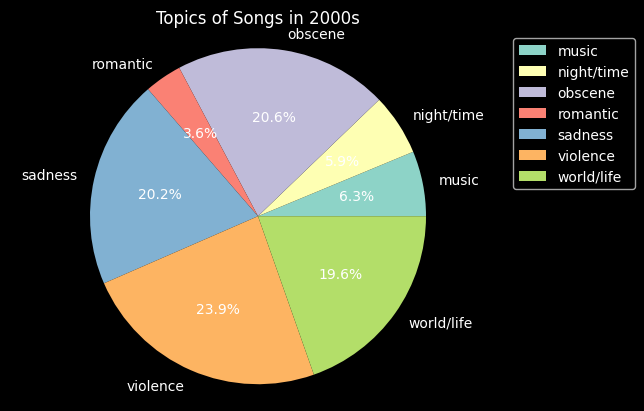

In [99]:
count_2000s = [293, 277, 963, 168, 944, 1116, 917]
fig_00s, ax_00s = plt.subplots()

ax_00s.pie(count_2000s, labels= labels, autopct="%1.1f%%")

ax_00s.axis('equal')

plt.title('Topics of Songs in 2000s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [100]:
music_topics_2010s.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,243,243,243,243,243,243,243,243,243,243,243
night/time,319,319,319,319,319,319,319,319,319,319,319
obscene,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679,1679
romantic,119,119,119,119,119,119,119,119,119,119,119
sadness,993,993,993,993,993,993,993,993,993,993,993
violence,1336,1336,1336,1336,1336,1336,1336,1336,1336,1336,1336
world/life,847,847,847,847,847,847,847,847,847,847,847


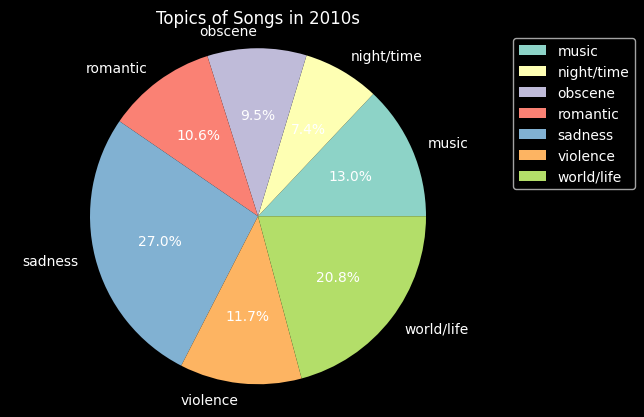

In [101]:
count_2010s = [431, 245, 317, 351, 898, 390, 692]
fig_10s, ax_10s = plt.subplots()

ax_10s.pie(count_2010s, labels= labels, autopct="%1.1f%%")

ax_10s.axis('equal')

plt.title('Topics of Songs in 2010s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [102]:
#music_topics_fifties.groupby(by="genre").count()
#music_topics_sixties.groupby(by="genre").count()
#music_topics_seventies.groupby(by="genre").count()
#music_topics_eighties.groupby(by="genre").count()
#music_topics_nineties.groupby(by="genre").count()
#music_topics_2000s.groupby(by="genre").count()
#music_topics_2010s.groupby(by="genre").count()

In [104]:
music_topics_50s_pop = music_topics_fifties.loc[music_topics_fifties.genre == 'pop']
print(music_topics_50s_pop.shape)
music_topics_60s_pop = music_topics_sixties.loc[music_topics_sixties.genre == 'pop']
print(music_topics_60s_pop.shape)
music_topics_70s_pop = music_topics_seventies.loc[music_topics_seventies.genre == 'pop']
print(music_topics_70s_pop.shape)
music_topics_80s_pop = music_topics_eighties.loc[music_topics_eighties.genre == 'pop']
print(music_topics_80s_pop.shape)
music_topics_90s_pop = music_topics_nineties.loc[music_topics_nineties.genre == 'pop']
print(music_topics_90s_pop.shape)
music_topics_00s_pop = music_topics_2000s.loc[music_topics_2000s.genre == 'pop']
print(music_topics_00s_pop.shape)
music_topics_10s_pop = music_topics_2010s.loc[music_topics_2010s.genre == 'pop']
print(music_topics_10s_pop.shape)

(323, 12)
(1073, 12)
(1023, 12)
(1165, 12)
(1056, 12)
(1098, 12)
(1164, 12)


In [105]:
music_topics_50s_pop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,42,42,42,42,42,42,42,42,42,42,42
night/time,25,25,25,25,25,25,25,25,25,25,25
obscene,25,25,25,25,25,25,25,25,25,25,25
romantic,58,58,58,58,58,58,58,58,58,58,58
sadness,90,90,90,90,90,90,90,90,90,90,90
violence,35,35,35,35,35,35,35,35,35,35,35
world/life,48,48,48,48,48,48,48,48,48,48,48


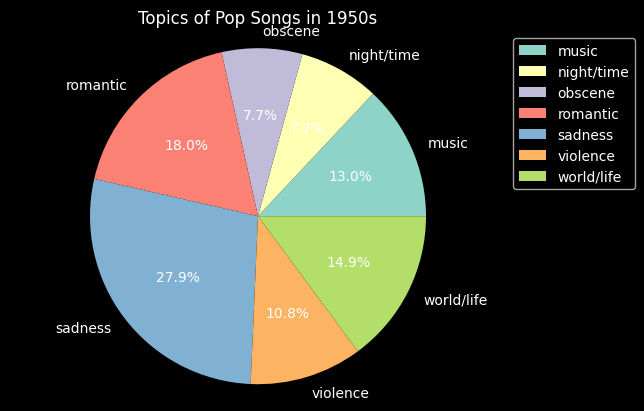

In [106]:
count_50s_pop = [42, 25, 25, 58, 90, 35, 48]
fig_50s_pop, ax_50s_pop = plt.subplots()

ax_50s_pop.pie(count_50s_pop, labels= labels, autopct="%1.1f%%")

ax_50s_pop.axis('equal')

plt.title('Topics of Pop Songs in 1950s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [107]:
music_topics_60s_pop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,133,133,133,133,133,133,133,133,133,133,133
night/time,64,64,64,64,64,64,64,64,64,64,64
obscene,86,86,86,86,86,86,86,86,86,86,86
romantic,137,137,137,137,137,137,137,137,137,137,137
sadness,330,330,330,330,330,330,330,330,330,330,330
violence,112,112,112,112,112,112,112,112,112,112,112
world/life,211,211,211,211,211,211,211,211,211,211,211


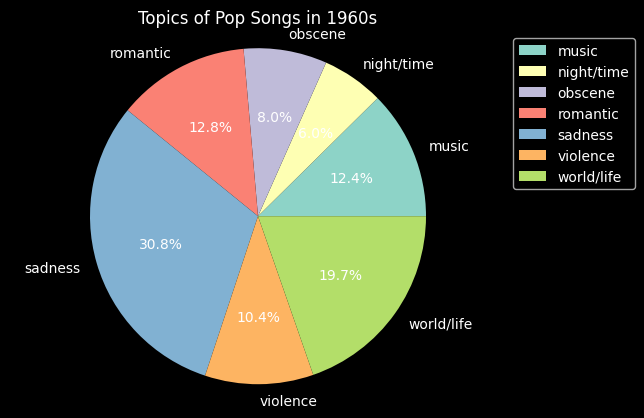

In [108]:
count_60s_pop = [133, 64, 86, 137, 330, 112, 211]
fig_60s_pop, ax_60s_pop = plt.subplots()

ax_60s_pop.pie(count_60s_pop, labels= labels, autopct="%1.1f%%")

ax_60s_pop.axis('equal')

plt.title('Topics of Pop Songs in 1960s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [109]:
music_topics_70s_pop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,129,129,129,129,129,129,129,129,129,129,129
night/time,82,82,82,82,82,82,82,82,82,82,82
obscene,79,79,79,79,79,79,79,79,79,79,79
romantic,72,72,72,72,72,72,72,72,72,72,72
sadness,223,223,223,223,223,223,223,223,223,223,223
violence,165,165,165,165,165,165,165,165,165,165,165
world/life,273,273,273,273,273,273,273,273,273,273,273


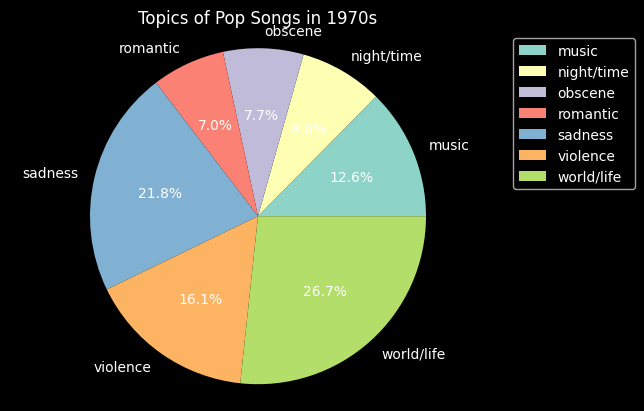

In [110]:
count_70s_pop = [129, 82, 79, 72, 223, 165, 273]
fig_70s_pop, ax_70s_pop = plt.subplots()

ax_70s_pop.pie(count_70s_pop, labels= labels, autopct="%1.1f%%")

ax_70s_pop.axis('equal')

plt.title('Topics of Pop Songs in 1970s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [111]:
music_topics_80s_pop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,73,73,73,73,73,73,73,73,73,73,73
night/time,96,96,96,96,96,96,96,96,96,96,96
obscene,95,95,95,95,95,95,95,95,95,95,95
romantic,61,61,61,61,61,61,61,61,61,61,61
sadness,296,296,296,296,296,296,296,296,296,296,296
violence,284,284,284,284,284,284,284,284,284,284,284
world/life,260,260,260,260,260,260,260,260,260,260,260


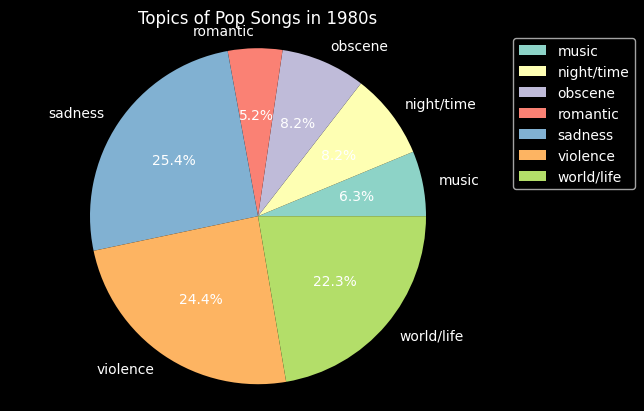

In [112]:
count_80s_pop = [73, 96, 95, 61, 296, 284, 260]
fig_80s_pop, ax_80s_pop = plt.subplots()

ax_80s_pop.pie(count_80s_pop, labels= labels, autopct="%1.1f%%")

ax_80s_pop.axis('equal')

plt.title('Topics of Pop Songs in 1980s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [113]:
music_topics_90s_pop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,48,48,48,48,48,48,48,48,48,48,48
night/time,61,61,61,61,61,61,61,61,61,61,61
obscene,186,186,186,186,186,186,186,186,186,186,186
romantic,51,51,51,51,51,51,51,51,51,51,51
sadness,271,271,271,271,271,271,271,271,271,271,271
violence,201,201,201,201,201,201,201,201,201,201,201
world/life,238,238,238,238,238,238,238,238,238,238,238


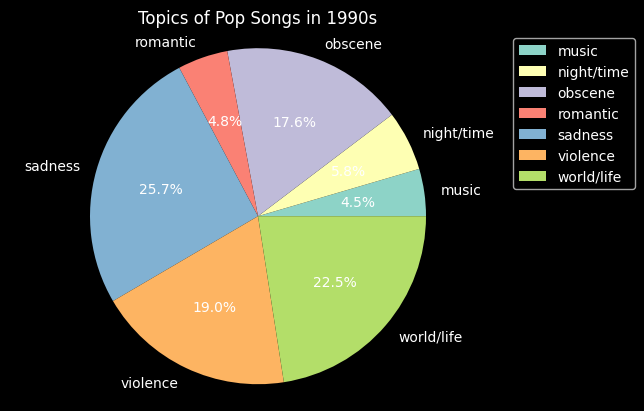

In [114]:
count_90s_pop = [48, 61, 186, 51, 271, 201, 238]
fig_90s_pop, ax_90s_pop = plt.subplots()

ax_90s_pop.pie(count_90s_pop, labels= labels, autopct="%1.1f%%")

ax_90s_pop.axis('equal')

plt.title('Topics of Pop Songs in 1990s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [115]:
music_topics_00s_pop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,42,42,42,42,42,42,42,42,42,42,42
night/time,67,67,67,67,67,67,67,67,67,67,67
obscene,254,254,254,254,254,254,254,254,254,254,254
romantic,25,25,25,25,25,25,25,25,25,25,25
sadness,268,268,268,268,268,268,268,268,268,268,268
violence,243,243,243,243,243,243,243,243,243,243,243
world/life,199,199,199,199,199,199,199,199,199,199,199


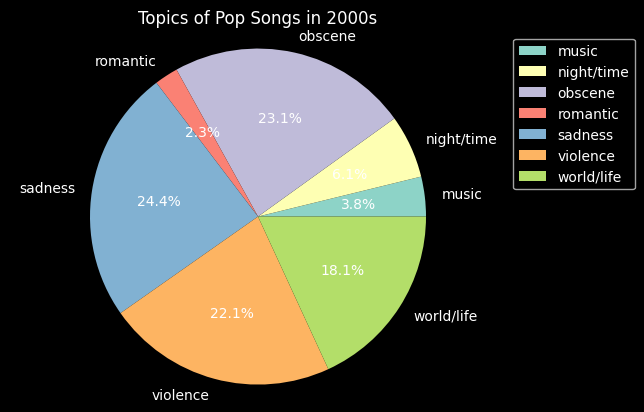

In [116]:
count_00s_pop = [42, 67, 254, 25, 268, 243, 199]
fig_00s_pop, ax_00s_pop = plt.subplots()

ax_00s_pop.pie(count_00s_pop, labels= labels, autopct="%1.1f%%")

ax_00s_pop.axis('equal')

plt.title('Topics of Pop Songs in 2000s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [51]:
music_topics_10s_pop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,36,36,36,36,36,36,36,36,36,36,36
night/time,60,60,60,60,60,60,60,60,60,60,60
obscene,495,495,495,495,495,495,495,495,495,495,495
romantic,27,27,27,27,27,27,27,27,27,27,27
sadness,224,224,224,224,224,224,224,224,224,224,224
violence,202,202,202,202,202,202,202,202,202,202,202
world/life,120,120,120,120,120,120,120,120,120,120,120


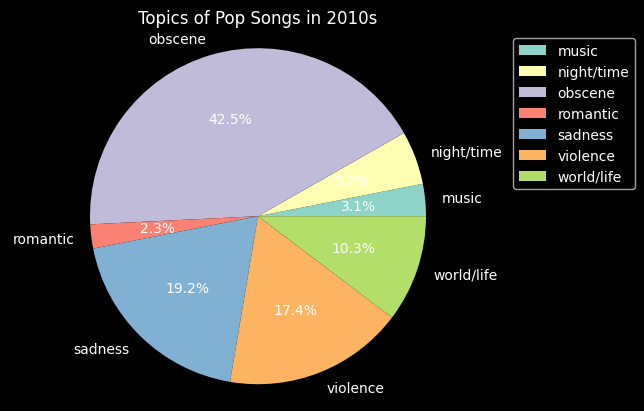

In [62]:
count_10s_pop = [36, 60, 495, 27, 224, 202, 120]
fig_10s_pop, ax_10s_pop = plt.subplots()

ax_10s_pop.pie(count_10s_pop, labels= labels, autopct="%1.1f%%")

ax_10s_pop.axis('equal')

plt.title('Topics of Pop Songs in 2010s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [103]:
music_topics_50s_jazz = music_topics_fifties.loc[music_topics_fifties.genre == 'jazz']
print(music_topics_50s_jazz.shape)
music_topics_60s_country = music_topics_sixties.loc[music_topics_sixties.genre == 'country']
print(music_topics_60s_country.shape)
music_topics_70s_pop = music_topics_seventies.loc[music_topics_seventies.genre == 'pop']
print(music_topics_70s_pop.shape)
music_topics_80s_rock = music_topics_eighties.loc[music_topics_eighties.genre == 'rock']
print(music_topics_80s_rock.shape)
music_topics_90s_reggae = music_topics_nineties.loc[music_topics_nineties.genre == 'reggae']
print(music_topics_90s_reggae.shape)
music_topics_00s_blues = music_topics_2000s.loc[music_topics_2000s.genre == 'blues']
print(music_topics_00s_blues.shape)
music_topics_10s_hip_hop = music_topics_2010s.loc[music_topics_2010s.genre == 'hip hop']
print(music_topics_10s_hip_hop.shape)

(403, 12)
(948, 12)
(1023, 12)
(816, 12)
(501, 12)
(761, 12)
(662, 12)


In [117]:
music_topics_50s_jazz.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,75,75,75,75,75,75,75,75,75,75,75
night/time,22,22,22,22,22,22,22,22,22,22,22
obscene,49,49,49,49,49,49,49,49,49,49,49
romantic,87,87,87,87,87,87,87,87,87,87,87
sadness,88,88,88,88,88,88,88,88,88,88,88
violence,18,18,18,18,18,18,18,18,18,18,18
world/life,64,64,64,64,64,64,64,64,64,64,64


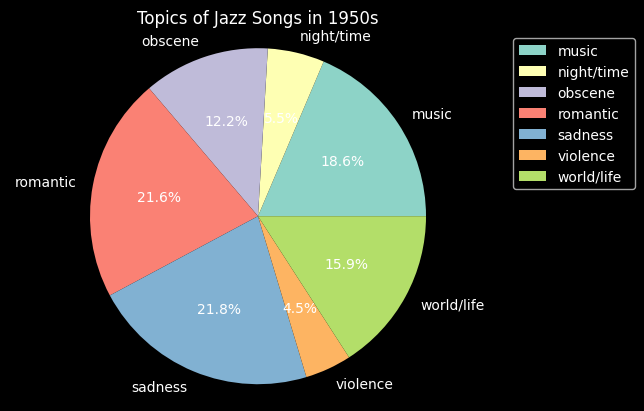

In [123]:
count_50s_jazz = [75, 22, 49, 87, 88, 18, 64]
fig_50s_jazz, ax_50s_jazz = plt.subplots()

ax_50s_jazz.pie(count_50s_jazz, labels= labels, autopct="%1.1f%%")

ax_50s_jazz.axis('equal')

plt.title('Topics of Jazz Songs in 1950s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [118]:
music_topics_60s_country.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,127,127,127,127,127,127,127,127,127,127,127
night/time,61,61,61,61,61,61,61,61,61,61,61
obscene,62,62,62,62,62,62,62,62,62,62,62
romantic,70,70,70,70,70,70,70,70,70,70,70
sadness,312,312,312,312,312,312,312,312,312,312,312
violence,109,109,109,109,109,109,109,109,109,109,109
world/life,207,207,207,207,207,207,207,207,207,207,207


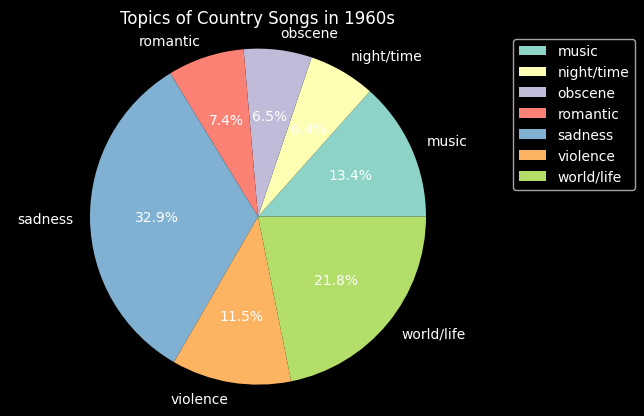

In [124]:
count_60s_country = [127, 61, 62, 70, 312, 109, 207]
fig_60s_country, ax_60s_country = plt.subplots()

ax_60s_country.pie(count_60s_country, labels= labels, autopct="%1.1f%%")

ax_60s_country.axis('equal')

plt.title('Topics of Country Songs in 1960s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [119]:
music_topics_80s_rock.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,35,35,35,35,35,35,35,35,35,35,35
night/time,68,68,68,68,68,68,68,68,68,68,68
obscene,73,73,73,73,73,73,73,73,73,73,73
romantic,15,15,15,15,15,15,15,15,15,15,15
sadness,193,193,193,193,193,193,193,193,193,193,193
violence,288,288,288,288,288,288,288,288,288,288,288
world/life,144,144,144,144,144,144,144,144,144,144,144


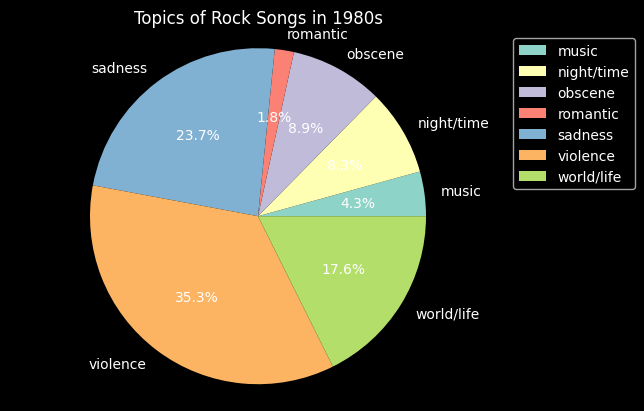

In [127]:
count_80s_rock = [35, 68, 73, 15, 193, 288, 144]
fig_80s_rock, ax_80s_rock = plt.subplots()

ax_80s_rock.pie(count_80s_rock, labels= labels, autopct="%1.1f%%")

ax_80s_rock.axis('equal')

plt.title('Topics of Rock Songs in 1980s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [120]:
music_topics_90s_reggae.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,30,30,30,30,30,30,30,30,30,30,30
night/time,24,24,24,24,24,24,24,24,24,24,24
obscene,161,161,161,161,161,161,161,161,161,161,161
romantic,10,10,10,10,10,10,10,10,10,10,10
sadness,49,49,49,49,49,49,49,49,49,49,49
violence,98,98,98,98,98,98,98,98,98,98,98
world/life,129,129,129,129,129,129,129,129,129,129,129


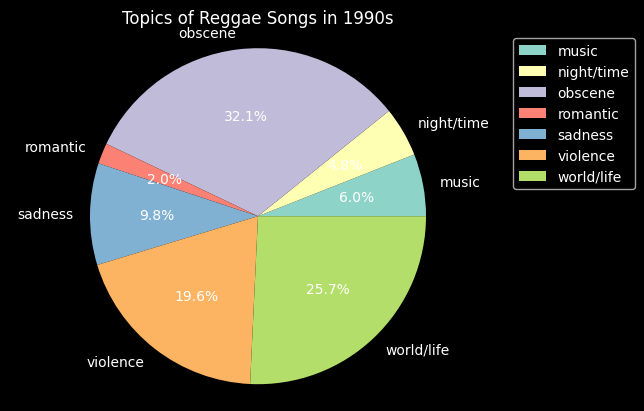

In [128]:
count_90s_reggae = [30, 24, 161, 10, 49, 98, 129]
fig_90s_reggae, ax_90s_reggae = plt.subplots()

ax_90s_reggae.pie(count_90s_reggae, labels= labels, autopct="%1.1f%%")

ax_90s_reggae.axis('equal')

plt.title('Topics of Reggae Songs in 1990s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [121]:
music_topics_00s_blues.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,64,64,64,64,64,64,64,64,64,64,64
night/time,54,54,54,54,54,54,54,54,54,54,54
obscene,112,112,112,112,112,112,112,112,112,112,112
romantic,55,55,55,55,55,55,55,55,55,55,55
sadness,160,160,160,160,160,160,160,160,160,160,160
violence,207,207,207,207,207,207,207,207,207,207,207
world/life,109,109,109,109,109,109,109,109,109,109,109


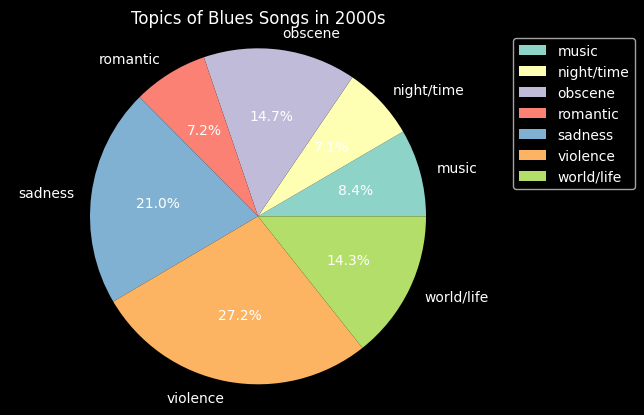

In [131]:
count_00s_blues = [64, 54, 112, 55, 160, 207, 109]
fig_00s_blues, ax_00s_blues = plt.subplots()

ax_00s_blues.pie(count_00s_blues, labels= labels, autopct="%1.1f%%")

ax_00s_blues.axis('equal')

plt.title('Topics of Blues Songs in 2000s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()

In [122]:
music_topics_10s_hip_hop.groupby(by="topic").count()

,artist_name,track_name,release_date,genre,lyrics,violence,world/life,night/time,romantic,obscene,sadness
topic,,,,,,,,,,,
music,11,11,11,11,11,11,11,11,11,11,11
night/time,9,9,9,9,9,9,9,9,9,9,9
obscene,520,520,520,520,520,520,520,520,520,520,520
romantic,3,3,3,3,3,3,3,3,3,3,3
sadness,20,20,20,20,20,20,20,20,20,20,20
violence,70,70,70,70,70,70,70,70,70,70,70
world/life,29,29,29,29,29,29,29,29,29,29,29


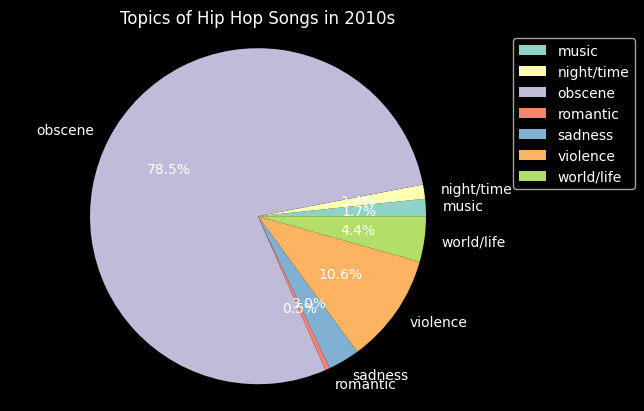

In [130]:
count_10s_hip_hop = [11, 9, 520, 3, 20, 70, 29]
fig_10s_hip_hop, ax_10s_hip_hop = plt.subplots()

ax_10s_hip_hop.pie(count_10s_hip_hop, labels= labels, autopct="%1.1f%%")

ax_10s_hip_hop.axis('equal')

plt.title('Topics of Hip Hop Songs in 2010s')

plt.style.use('dark_background')

plt.legend(labels, bbox_to_anchor=(1,1), loc='best')

plt.show()